In [53]:
import numpy as np

In [57]:
import pandas as pd
df=pd.read_csv("Advertising.csv")
df=df.iloc[:,1 : len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
import seaborn as sns

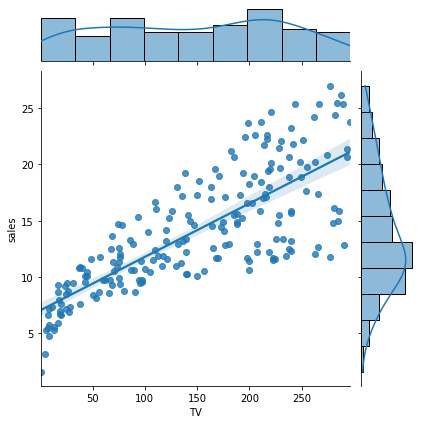

In [8]:
sns.jointplot(x="TV",y="sales",data=df,kind="reg"); #TV ye yapılan reklam harcamaları ile satıslar dogru orantılıdır

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
x=df[["TV"]]

In [12]:
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [13]:
y=df[["sales"]]
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [14]:
reg=LinearRegression()

In [15]:
model=reg.fit(x,y)

In [19]:
model

LinearRegression()

In [20]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [21]:
model.intercept_   #sabit b0 degeri

array([7.03259355])

In [22]:
model.coef_     #b1 katsayısı

array([[0.04753664]])

In [23]:
#rkare                       #bagımlı degiskendeki degisikligin bagımsız degsikenlerce acıklanma yüzdesidir
model.score(x,y) 

0.611875050850071

In [24]:
#TAHMİN

In [27]:
model.predict([[165]])   #tv harcamam 165 oldugnda satıs degerini tahmin et

array([[14.87613922]])

In [28]:
#basit dıgrusal regresyon mantıgı/formulu ile:

In [30]:
model.intercept_+model.coef_*165            # b0+b1*x

array([[14.87613922]])

In [33]:
model.predict(x)[0:6]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [35]:
gercek_y=y[0:10]

In [36]:
tahmin_edilen_y=pd.DataFrame(model.predict(x)[0:10])

In [37]:
hatalar=pd.concat([gercek_y, tahmin_edilen_y],axis=1)

In [38]:
hatalar

,sales,0
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [46]:
hatalar.columns=["gercek_y","tahmin_edilen_y"]

In [47]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [48]:
hatalar["hata"] = hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]    #model basarısını kontrol ediyoruz

In [49]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [50]:
hatalar["hatakareler"]=hatalar["hata"]**2

In [51]:
hatalar

,gercek_y,tahmin_edilen_y,hata,hatakareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [54]:
np.mean(hatalar["hatakareler"])    #hata kareler ortalaması

9.290350329638104